In [1]:
import torch
from trainer import Trainer
from dataset import YoloVOCDataset
from model import YoloV3
from loss import YoloV3Loss
from utils import plot_labels, plot_prediction
import config
from torch.utils.data import DataLoader
from pprint import pprint
from tqdm import tqdm

In [2]:
batch_size = 10
dataset = YoloVOCDataset(
    csv_file=config.DATASET_PATH + "test.csv",
    image_dir=config.IMAGES_PATH,
    label_dir=config.LABELS_PATH,
    transform=config.test_transform,
)
loader = DataLoader(dataset, batch_size=batch_size, num_workers=4)
model = YoloV3(20).to(config.DEVICE)
loss_fn = YoloV3Loss().to(config.DEVICE)
optimizer = torch.optim.Adam
epochs = 500
lr = 0.001
checkpoint_path = config.CHECKPOINT_PATH
scaled_anchors = (
    torch.tensor(config.ANCHORS)
    * torch.tensor(
        [config.IMAGE_SIZE // 32, config.IMAGE_SIZE // 16, config.IMAGE_SIZE // 8]
    )
    .unsqueeze(1)
    .unsqueeze(1)
    .repeat(1, 3, 2)
).to(config.DEVICE)

trainer = Trainer(
    model,
    loader,
    loss_fn,
    scaled_anchors,
    optimizer,
    epochs,
    lr,
    batch_size,
    checkpoint_path,
)
trainer.load_checkpoint(checkpoint_path)
images, labels = next(iter(loader))

model.eval()
predictions = model(images.to(config.DEVICE))
# plot_labels(images, labels, 1)


Loaded checkpoint trained on 50 epochs with a loss of 0.7088914652196289


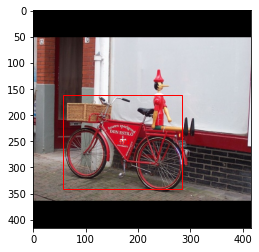

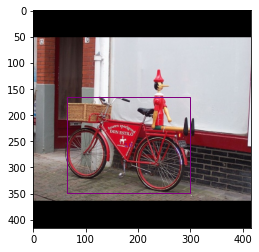

100%|██████████| 496/496 [16:08<00:00,  1.95s/it]


{'map': tensor(0.1982),
 'map_50': tensor(0.4374),
 'map_75': tensor(0.1515),
 'map_large': tensor(-1.),
 'map_medium': tensor(-1.),
 'map_per_class': tensor(-1.),
 'map_small': tensor(0.1982),
 'mar_1': tensor(0.2468),
 'mar_10': tensor(0.2867),
 'mar_100': tensor(0.2886),
 'mar_100_per_class': tensor(-1.),
 'mar_large': tensor(-1.),
 'mar_medium': tensor(-1.),
 'mar_small': tensor(0.2886)}
None


In [3]:
import importlib
imported_module = importlib.import_module("utils")
importlib.reload(imported_module)
from utils import plot_labels, plot_prediction, calculate_mAP

plot_prediction(images, predictions, 9, 0.7, 0.7)
plot_labels(images, labels, 9)

pprint(calculate_mAP(model, loader, 0.2, 0.45))
